<a href="https://colab.research.google.com/github/SirvavialTAG/MachineLearning/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Практика 2: Статистика в действии и её влияние на модель

## 1. Анализ целевой переменной Y с точки зрения статистики

In [1]:
# Устанавливаем нужные библиотеки
!pip install pandas scikit-learn seaborn scipy

In [2]:
# Импортиреум нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Загрузка набора данных
df = pd.read_csv('insurance.csv')

In [4]:
# Вывод данных
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# Выводим все колонки набора данных
for column in df.columns:
  print(f'колонка: {column}')

колонка: age
колонка: sex
колонка: bmi
колонка: children
колонка: smoker
колонка: region
колонка: charges


In [6]:
# Выводим информацию о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Проверка на пропущенные значения
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
# Преобразование числовой переменной в категориальную
df['is_big_charges'] = np.where(df['charges'] >= 35000, 1, 0).astype(int)

In [9]:
# Проверка добавления нового столбца
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'is_big_charges'],
      dtype='object')

In [10]:
Y = df['is_big_charges'] # выбираем целевую переменную (категориальную)
X = df.drop('is_big_charges', axis=1) # переменные для проверки влияния

X = X.drop('charges', axis=1) # Дроп базовой переменной

In [11]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


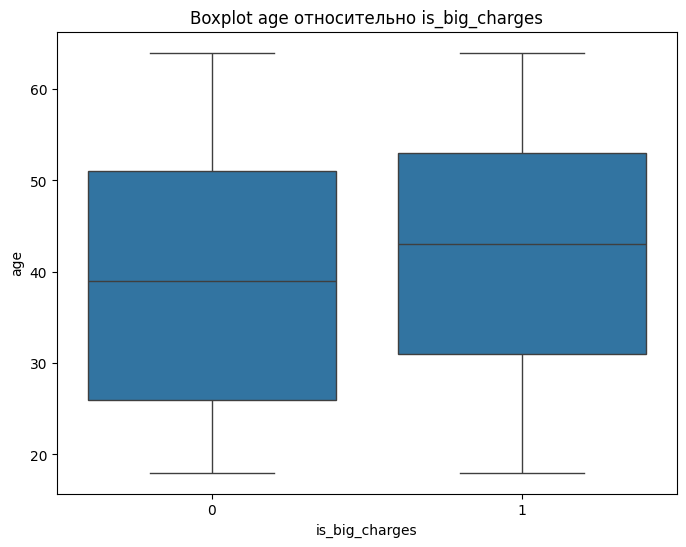

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


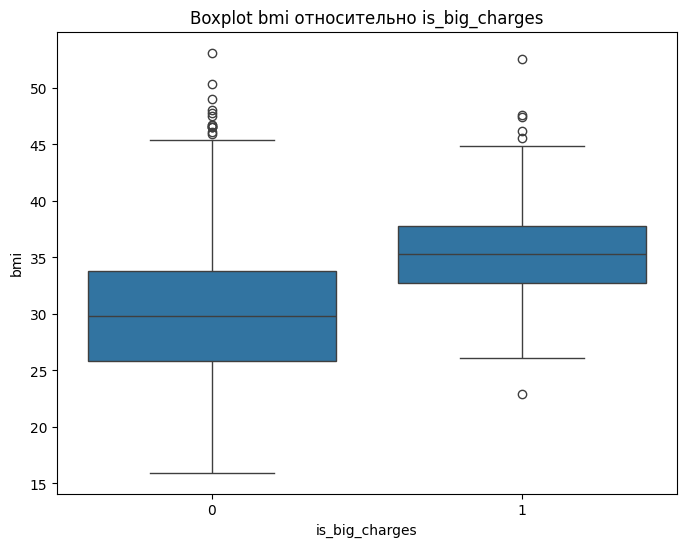

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


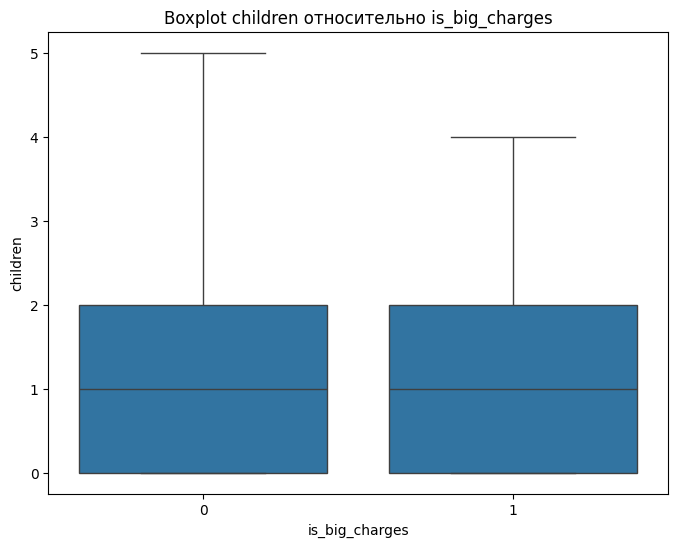

In [12]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_big_charges', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_big_charges')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

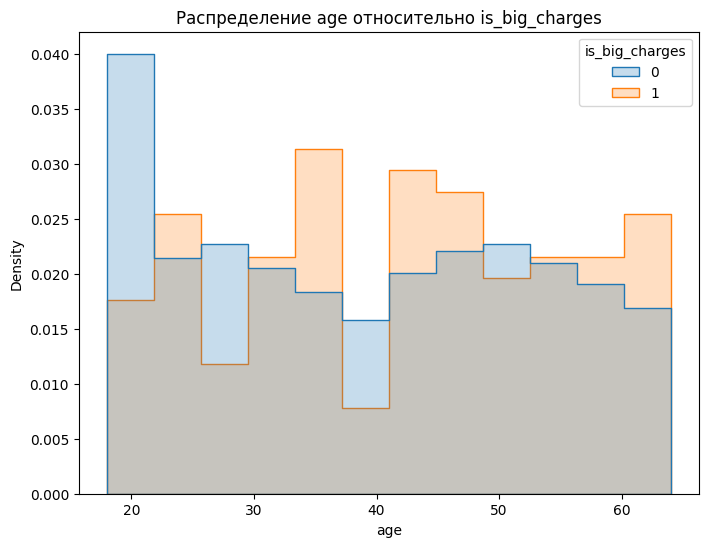

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

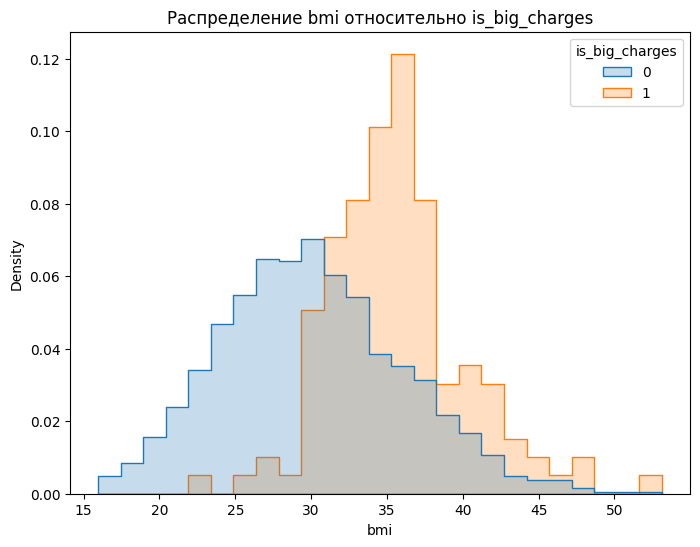

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

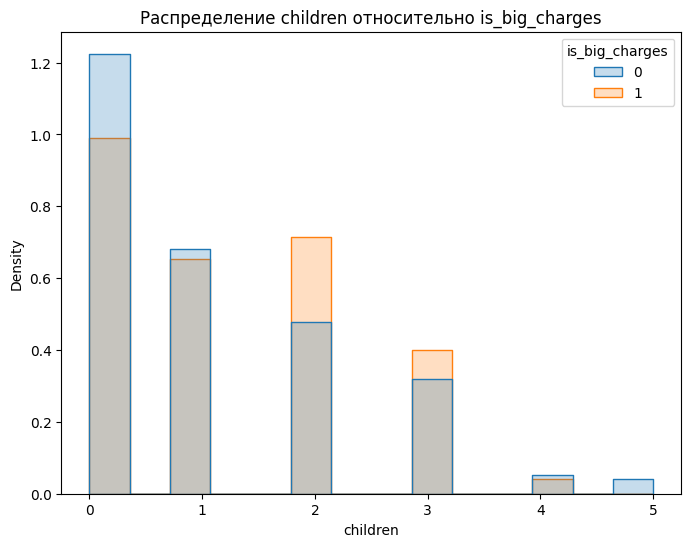

In [13]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_big_charges', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_big_charges')
    plt.show()

## Боксплоты
1. Исходя из боксплота распределения возраста относительно того, были ли расходы большими или нет, можно сказать, что медианы двух групп примерно одинаковы. Из этого можно заключить, что возраст не является определяющим фактором для разделения людей на группы с большими и небольшими расходами.

2. Исходя из боксплота распределения индекса массы тела относительно того, были ли расходы большими или нет, можно сказать, что медианы двух групп существенно различаются. Также при анализе этого графика стоит заметить более большой разброс значений у людей с небольшими расходами. Из этого можно заключить, что индекс массы тела является определяющим фактором для разделения людей на группы с большими и небольшими расходами.

3. Исходя из боксплота распределения количества детей относительно того, были ли расходы большими или нет, можно сказать, что медианы двух групп одинаковы. Из этого можно заключить, что количество детей не является определяющим фактором для разделения людей на группы с большими и небольшими расходами.

## Гистограммы
1. Исследование графика, отражающего распределение людей по возрасту в зависимости от уровня их расходов, позволяет сделать вывод, что у людей с высокими затратами наиболее часто встречаются значения возраста в диапазоне от 32 до 37 лет и от 42 до 48 лет. В то же время, у тех, кто не испытывает финансовых трудностей, чаще всего встречаются значения возраста в диапазоне от 18 до 22 лет.

2. Анализ гистограммы распределения массы тела в зависимости от величины расходов показывает, что наибольшая концентрация значений индекса массы тела у людей с высокими затратами варьируется от 32 до 37 единиц. В то же время, у тех, кто не испытывает больших финансовых трудностей, наибольшая частота таких значений находится в диапозоне от 22 до 34 единиц.

In [16]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_big_charges')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('is_big_charges')[df.select_dtypes(include=['object']).columns].describe()

## Описание полученных результатов

In [17]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_big_charges')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для age:

                 count       mean        std   min   25%   50%   75%   max
is_big_charges                                                            
0               1205.0  38.910373  14.081405  18.0  26.0  39.0  51.0  64.0
1                133.0  41.894737  13.518373  18.0  31.0  43.0  53.0  64.0


Описательная статистика для bmi:

                 count       mean       std     min     25%   50%    75%  \
is_big_charges                                                             
0               1205.0  30.109203  5.999856  15.960  25.800  29.8  33.82   
1                133.0  35.684474  4.484903  22.895  32.775  35.3  37.80   

                  max  
is_big_charges         
0               53.13  
1               52.58  


Описательная статистика для children:

                 count      mean       std  min  25%  50%  75%  max
is_big_charges                                                     
0               1205.0  1.079668  1.213282  0.0  0.0

In [18]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


sex                     smoker                   region  \
               count unique     top freq  count unique  top  freq  count   
is_big_charges                                                             
0               1205      2  female  613   1205      2   no  1061   1205   
1                133      2    male   84    133      2  yes   130    133   

                                       
               unique        top freq  
is_big_charges                         
0                   4  southeast  309  
1                   4  southeast   55

## Категориальные переменные
## **1. sex**:

* В группе с низкими расходами больше женщин (613 из 1205).
* В группе с высокими расходами больше мужчин (84 из 133).

## **2. smoker**:

* В группе с низкими расходами преобладают некурящие (1061 из 1205).
* В группе с высокими расходами большинство курящие (130 из 133).

## **3. region**:

* В обеих группах преобладает регион "southeast", однако в группе с высокими расходами его доля меньше (55 из 133 против 309 из 1205 в группе с низкими расходами).

## Числовые переменные
## **1. age**:

* Средний возраст в группе с высокими расходами (41 год) немного выше, чем в группе с низкими (38.9 лет).
* Стандартное отклонение возраста в обеих группах примерно одинаковое.

## **2. bmi**:

* Средний BMI заметно выше в группе с высокими расходами (35.68) по сравнению с группой с низкими расходами (30.1).
* Максимальное значение BMI в группе с низкими расходами (53.13) значительно превышает максимальное значение в группе с высокими расходами (52.58), что может свидетельствовать о наличии выбросов в группе с низкими расходами.

## **3. children**:

* Среднее количество детей немного выше в группе с высокими расходами (1.23) по сравнению с группой с низкими расходами (1.08).
* Стандартное отклонение количества детей практически одинаково в обеих группах.

## Вывод:

Анализ показывает, что между группами с высокими и низкими медицинскими расходами существуют различия по ряду переменных:

* Наиболее выраженные различия наблюдаются по переменным "smoker" и "bmi". Так, в группе с высокими расходами значительно больше курящих и выше средний BMI. Это может свидетельствовать о том, что курение и высокий BMI являются факторами риска, увеличивающими вероятность высоких медицинских расходов.
* Также наблюдаются различия по полу и региону проживания, но их влияние на медицинские расходы требует дальнейшего изучения.

## 2. Расчёт теста Пирсона

In [19]:
# Рассчитывание коэффициентов корреляции Пирсона для каждого признака:
df[df.select_dtypes(include=[np.number]).columns].corr()

,age,bmi,children,charges,is_big_charges
age,1.000000,0.109272,0.042469,0.299008,0.063577
bmi,0.109272,1.000000,0.012759,0.198341,0.273647
children,0.042469,0.012759,1.000000,0.067998,0.038091
charges,0.299008,0.198341,0.067998,1.000000,0.800408
is_big_charges,0.063577,0.273647,0.038091,0.800408,1.000000


### Интерпретация:

**1. Charges и is_big_charges (0.800408):**
* Наиболее сильная корреляция  наблюдается между расходами и принадлежности расходов к категории больших(is_big_charges). Это обусловлено тем, что переменная is_big_charges является производной от charges.

**2. Bmi и charges (0.198341):**
* Небольшая положительная корреляция  наблюдается между bmi (индекс массы тела) и charges. Это говорит о том, что с увеличением индекса массы тела увеличиваются и расходы, однако связь не очень сильная.

**3. Age и charges (0.299008):**
* Возраст также имеет небольшую положительную корреляцию с расходами, что указывает на то, что с возрастом медицинские расходы в среднем растут.

**4. Bmi и is_big_charges (0.273647):**
* Индекс массы тела также имеет небольшую положительную корреляцию с принадлежности расходов к категории больших(is_big_charges). Это означает, что люди с более большим индексом тела совершают более крупные расходы.

## 3. Немного машинного обучения

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()
print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['age', 'sex', 'children', 'smoker', 'region']


In [38]:
categorical_features.remove('age')
categorical_features.remove('children')
print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['sex', 'smoker', 'region']


In [39]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True)

In [40]:
X_processed

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


In [43]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Числовые признаки:", numeric_features)

Числовые признаки: ['age', 'bmi', 'children']


In [44]:
numeric_features.remove('children')
print("Числовые признаки:", numeric_features)

Числовые признаки: ['age', 'bmi']


In [45]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [46]:
X_processed

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0,False,True,False,False,True
1,0.000000,0.479150,1,True,False,False,True,False
2,0.217391,0.458434,3,True,False,False,True,False
3,0.326087,0.181464,0,True,False,True,False,False
4,0.304348,0.347592,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,3,True,False,True,False,False
1334,0.000000,0.429379,0,False,False,False,False,False
1335,0.000000,0.562012,0,False,False,False,True,False
1336,0.065217,0.264730,0,False,False,False,False,True


In [47]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [48]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9720
Точность на тестовой выборке: 0.9888

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       241
           1       0.96      0.93      0.94        27

    accuracy                           0.99       268
   macro avg       0.98      0.96      0.97       268
weighted avg       0.99      0.99      0.99       268



In [49]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

            Feature  Coefficient
1               bmi     5.566818
4        smoker_yes     4.923909
0               age     1.087634
7  region_southwest     0.325704
5  region_northwest    -0.266517
6  region_southeast     0.237201
3          sex_male     0.206268
2          children     0.145947


## 4. Построение модели логистической регрессии для предсказания качества вина

In [50]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9761
Отклонение точности: 0.0077


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

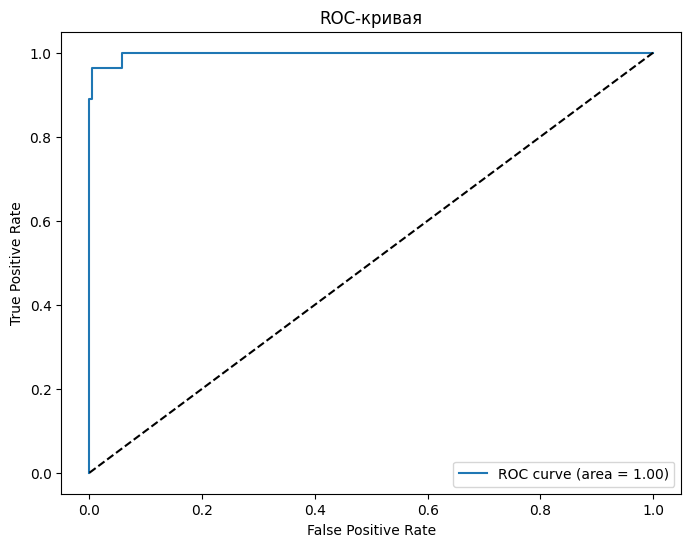

In [52]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()